In [1]:
import pandas as pd
import numpy as np
import torch
from datetime import datetime

In [2]:
chart24 = pd.read_csv("../Code/output/chart24Item17.csv")

In [3]:
patients = pd.read_csv("../Code/output/patientsinfo.csv")

In [4]:
chart24.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE
0,36,165660,FIO,2134-05-12T12:00:00.000-04:00,100.00
1,36,165660,PH,2134-05-12T12:35:00.000-04:00,7.29
2,36,165660,HR,2134-05-12T13:00:00.000-04:00,86.00
3,36,165660,SBP,2134-05-12T13:00:00.000-04:00,137.00
4,36,165660,DBP,2134-05-12T13:00:00.000-04:00,72.00


In [5]:
chart24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11377878 entries, 0 to 11377877
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 434.0+ MB


# Data cleaning

In [6]:
def chart_cleaning(df):
    # GLU
    df = df.drop(df[(df.ITEMID=='GLU') & (df.VALUE>5000)].index)
    # DBP
    df = df.drop(df[(df.ITEMID=='DBP') & (df.VALUE>1000)].index)
    df = df.drop(df[(df.ITEMID=='DBP') & (df.VALUE<0)].index)
    # FIO -- ignore
    # df = df.drop(df[(df.ITEMID=='FIO') & (df.VALUE>100)].index)
    # HEIGHT
    df = df.drop(df[(df.ITEMID=='HEIGHT') & (df.VALUE>300)].index)
    # HR
    df = df.drop(df[(df.ITEMID=='HR') & (df.VALUE>10000)].index)
    # MBP
    df = df.drop(df[(df.ITEMID=='MBP') & (df.VALUE>1000)].index)
    df = df.drop(df[(df.ITEMID=='MBP') & (df.VALUE<0)].index)
    # OS
    df = df.drop(df[(df.ITEMID=='OS') & (df.VALUE>10000)].index)
    # PH
    df = df.drop(df[(df.ITEMID=='PH') & (df.VALUE>10)].index) 
    # RESPR
    df = df.drop(df[(df.ITEMID=='RESPR') & (df.VALUE>1000)].index)
    # SBP
    df = df.drop(df[(df.ITEMID=='SBP') & (df.VALUE>1000)].index)
    # TEMP
    df = df.drop(df[(df.ITEMID=='TEMP') & (df.VALUE>50)].index) 
    df = df.drop(df[(df.ITEMID=='TEMP') & (df.VALUE<20)].index)
    # weight
    df = df.drop(df[(df.ITEMID=='WEIGHT') & (df.VALUE>1000)].index) 
    df = df.drop(df[(df.ITEMID=='WEIGHT') & (df.VALUE<10)].index)

    return df

In [7]:
chart24 = chart_cleaning(chart24)

In [8]:
chart24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11375676 entries, 0 to 11377877
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   CHARTTIME   object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 520.7+ MB


# Data preprocessing

In [9]:
chart24[['TIME']] = chart24['CHARTTIME'].apply(lambda x: x[:10] +' '+ x[11:13])

In [10]:
chart24.head()

,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,TIME
0,36,165660,FIO,2134-05-12T12:00:00.000-04:00,100.00,2134-05-12 12
1,36,165660,PH,2134-05-12T12:35:00.000-04:00,7.29,2134-05-12 12
2,36,165660,HR,2134-05-12T13:00:00.000-04:00,86.00,2134-05-12 13
3,36,165660,SBP,2134-05-12T13:00:00.000-04:00,137.00,2134-05-12 13
4,36,165660,DBP,2134-05-12T13:00:00.000-04:00,72.00,2134-05-12 13


In [11]:
chart24_hourly = chart24[['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'VALUE', 'TIME']].groupby(['SUBJECT_ID', 'HADM_ID', 'ITEMID', 'TIME'], as_index=False).mean()

In [12]:
chart24_hourly.head()

,SUBJECT_ID,HADM_ID,ITEMID,TIME,VALUE
0,3,145834,DBP,2101-10-20 18,24.000000
1,3,145834,DBP,2101-10-20 19,36.200000
2,3,145834,DBP,2101-10-20 20,47.125000
3,3,145834,DBP,2101-10-20 21,44.375000
4,3,145834,DBP,2101-10-20 22,67.666667


In [13]:
chart24_hourly.info() ## 8039549 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8039549 entries, 0 to 8039548
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   SUBJECT_ID  int64  
 1   HADM_ID     int64  
 2   ITEMID      object 
 3   TIME        object 
 4   VALUE       float64
dtypes: float64(1), int64(2), object(2)
memory usage: 368.0+ MB


In [14]:
items17 = chart24['ITEMID'].unique()

In [15]:
chart24_hourly_pivot = chart24_hourly.pivot(index = ['HADM_ID', 'TIME'],columns='ITEMID', values = 'VALUE')

In [16]:
chart24_hourly_pivot.tail()

ITEMID                 CRR   DBP   FIO    GLU  GMR   GO  GT  GVR  HEIGHT  \
HADM_ID TIME                                                               
199999  2136-04-07 12  NaN  52.0  80.0    NaN  6.0  4.0 NaN  5.0     NaN   
        2136-04-07 13  NaN  57.0   NaN    NaN  NaN  NaN NaN  NaN     NaN   
        2136-04-07 14  NaN  56.0   NaN    NaN  NaN  NaN NaN  NaN     NaN   
        2136-04-07 15  NaN  58.0   NaN    NaN  NaN  NaN NaN  NaN     NaN   
        2136-04-07 16  NaN  61.0   NaN  138.0  NaN  NaN NaN  NaN     NaN   

ITEMID                   HR   MBP    OS  PH  RESPR    SBP       TEMP  WEIGHT  
HADM_ID TIME                                                                  
199999  2136-04-07 12  69.0  83.0  94.0 NaN   27.0  155.0  37.666667     NaN  
        2136-04-07 13  76.0  80.0  93.0 NaN   27.0  144.0        NaN     NaN  
        2136-04-07 14  76.0  81.0  93.0 NaN   29.0  152.0        NaN     NaN  
        2136-04-07 15  75.0  83.0  93.0 NaN   33.0  155.0  38.166667     NaN  
        2136-04-07 16  78.0  76.0  95.0 NaN   27.0  129.0        NaN     NaN

In [17]:
chart24_hourly_pivot2 = chart24_hourly_pivot.reset_index()

In [18]:
chart24_hourly_pivot2.head()

ITEMID,HADM_ID,TIME,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
0,100001,2117-09-11 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.0,NaN,NaN,NaN,14.0,NaN,NaN,98.01
1,100001,2117-09-11 13,NaN,100.0,NaN,NaN,6.0,4.0,NaN,5.0,NaN,118.0,122.0,NaN,NaN,22.0,192.0,36.666667,NaN
2,100001,2117-09-11 14,NaN,85.0,NaN,261.0,NaN,NaN,NaN,NaN,NaN,118.0,103.0,NaN,NaN,15.0,165.0,NaN,NaN
3,100001,2117-09-11 15,NaN,64.0,NaN,179.5,NaN,NaN,NaN,NaN,NaN,110.0,76.0,NaN,NaN,15.0,119.0,NaN,NaN
4,100001,2117-09-11 16,NaN,84.0,NaN,170.0,6.0,4.0,NaN,5.0,NaN,104.0,105.0,100.0,NaN,16.0,169.0,36.611111,NaN


In [19]:
chart24_hourly_pivot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039207 entries, 0 to 1039206
Data columns (total 19 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   HADM_ID  1039207 non-null  int64  
 1   TIME     1039207 non-null  object 
 2   CRR      3274 non-null     float64
 3   DBP      981090 non-null   float64
 4   FIO      62889 non-null    float64
 5   GLU      278857 non-null   float64
 6   GMR      349937 non-null   float64
 7   GO       331540 non-null   float64
 8   GT       200876 non-null   float64
 9   GVR      347562 non-null   float64
 10  HEIGHT   7966 non-null     float64
 11  HR       999703 non-null   float64
 12  MBP      975531 non-null   float64
 13  OS       968523 non-null   float64
 14  PH       122321 non-null   float64
 15  RESPR    983809 non-null   float64
 16  SBP      981371 non-null   float64
 17  TEMP     365708 non-null   float64
 18  WEIGHT   54474 non-null    float64
dtypes: float64(17), int64(1), object(1)
memory

In [20]:
chart24_norm = chart24_hourly_pivot2.copy()

In [21]:
for col in chart24_norm.columns[2:]:
    chart24_norm[[col]] = (chart24_norm[[col]] - chart24_norm[[col]].min())/(chart24_norm[[col]].max()-chart24_norm[[col]].min())

In [22]:
chart24_norm.head()

ITEMID,HADM_ID,TIME,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
0,100001,2117-09-11 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022555,NaN,NaN,NaN,0.033466,NaN,NaN,0.095976
1,100001,2117-09-11 13,NaN,0.112360,NaN,NaN,1.0,1.0,NaN,1.0,NaN,0.021815,0.170868,NaN,NaN,0.052590,0.467153,0.739448,NaN
2,100001,2117-09-11 14,NaN,0.095506,NaN,0.106967,NaN,NaN,NaN,NaN,NaN,0.021815,0.144258,NaN,NaN,0.035857,0.401460,NaN,NaN
3,100001,2117-09-11 15,NaN,0.071910,NaN,0.073566,NaN,NaN,NaN,NaN,NaN,0.020336,0.106443,NaN,NaN,0.035857,0.289538,NaN,NaN
4,100001,2117-09-11 16,NaN,0.094382,NaN,0.069672,1.0,1.0,NaN,1.0,NaN,0.019227,0.147059,0.010314,NaN,0.038247,0.411192,0.736843,NaN


In [23]:
# fill null with -1
chart24_norm.fillna(-1, inplace=True)

In [24]:
chart24_norm.head()

ITEMID,HADM_ID,TIME,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT
0,100001,2117-09-11 12,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,0.022555,-1.000000,-1.000000,-1.0,0.033466,-1.000000,-1.000000,0.095976
1,100001,2117-09-11 13,-1.0,0.112360,-1.0,-1.000000,1.0,1.0,-1.0,1.0,-1.0,0.021815,0.170868,-1.000000,-1.0,0.052590,0.467153,0.739448,-1.000000
2,100001,2117-09-11 14,-1.0,0.095506,-1.0,0.106967,-1.0,-1.0,-1.0,-1.0,-1.0,0.021815,0.144258,-1.000000,-1.0,0.035857,0.401460,-1.000000,-1.000000
3,100001,2117-09-11 15,-1.0,0.071910,-1.0,0.073566,-1.0,-1.0,-1.0,-1.0,-1.0,0.020336,0.106443,-1.000000,-1.0,0.035857,0.289538,-1.000000,-1.000000
4,100001,2117-09-11 16,-1.0,0.094382,-1.0,0.069672,1.0,1.0,-1.0,1.0,-1.0,0.019227,0.147059,0.010314,-1.0,0.038247,0.411192,0.736843,-1.000000


In [25]:
chart24_norm[['value']] = chart24_norm.apply(lambda x: list(x['CRR':]), axis=1)

In [26]:
chart24_norm.head()

ITEMID,HADM_ID,TIME,CRR,DBP,FIO,GLU,GMR,GO,GT,GVR,HEIGHT,HR,MBP,OS,PH,RESPR,SBP,TEMP,WEIGHT,value
0,100001,2117-09-11 12,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,0.022555,-1.000000,-1.000000,-1.0,0.033466,-1.000000,-1.000000,0.095976,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
1,100001,2117-09-11 13,-1.0,0.112360,-1.0,-1.000000,1.0,1.0,-1.0,1.0,-1.0,0.021815,0.170868,-1.000000,-1.0,0.052590,0.467153,0.739448,-1.000000,"[-1.0, 0.11235955056179775, -1.0, -1.0, 1.0, 1..."
2,100001,2117-09-11 14,-1.0,0.095506,-1.0,0.106967,-1.0,-1.0,-1.0,-1.0,-1.0,0.021815,0.144258,-1.000000,-1.0,0.035857,0.401460,-1.000000,-1.000000,"[-1.0, 0.09550561797752809, -1.0, 0.1069672131..."
3,100001,2117-09-11 15,-1.0,0.071910,-1.0,0.073566,-1.0,-1.0,-1.0,-1.0,-1.0,0.020336,0.106443,-1.000000,-1.0,0.035857,0.289538,-1.000000,-1.000000,"[-1.0, 0.07191011235955057, -1.0, 0.0735655737..."
4,100001,2117-09-11 16,-1.0,0.094382,-1.0,0.069672,1.0,1.0,-1.0,1.0,-1.0,0.019227,0.147059,0.010314,-1.0,0.038247,0.411192,0.736843,-1.000000,"[-1.0, 0.09438202247191012, -1.0, 0.0696721311..."


In [27]:
chart24_grouped = chart24_norm[['HADM_ID', 'value']].groupby('HADM_ID').agg(lambda x: list(x))

In [30]:
chart24_grouped[['num_stamps']] = chart24_grouped['value'].apply(lambda x: len(x))

In [31]:
chart24_grouped.head()

ITEMID,value,num_stamps
HADM_ID,,
100001,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",24
100003,"[[-1.0, 0.04044943820224719, -1.0, -1.0, 1.0, ...",23
100006,"[[-1.0, 0.09662921348314607, -1.0, -1.0, 1.0, ...",24
100007,"[[-1.0, 0.07191011235955057, -1.0, 0.047131147...",25
100009,"[[-1.0, -1.0, -1.0, 0.045081967213114756, -1.0...",20


In [32]:
chart24_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45824 entries, 100001 to 199999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   value       45824 non-null  object
 1   num_stamps  45824 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [33]:
# remove the admissions which has more than 30 timestamps
chart24_grouped.drop(chart24_grouped[chart24_grouped['num_stamps']>30].index, inplace=True)

In [34]:
chart24_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45698 entries, 100001 to 199999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   value       45698 non-null  object
 1   num_stamps  45698 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [35]:
chart24_grouped.head()

ITEMID,value,num_stamps
HADM_ID,,
100001,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",24
100003,"[[-1.0, 0.04044943820224719, -1.0, -1.0, 1.0, ...",23
100006,"[[-1.0, 0.09662921348314607, -1.0, -1.0, 1.0, ...",24
100007,"[[-1.0, 0.07191011235955057, -1.0, 0.047131147...",25
100009,"[[-1.0, -1.0, -1.0, 0.045081967213114756, -1.0...",20


In [36]:
chart24_valueWithLabel = chart24_grouped[['value']].join(patients[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']].set_index('HADM_ID'), how='inner')


In [37]:
# split the data to train and test
chart24_shuffle = chart24_valueWithLabel.sample(frac=1)
chart24_test = chart24_shuffle.iloc[:7000, ]
chart24_valid = chart24_shuffle.iloc[7001:14000, ]
chart24_train = chart24_shuffle.iloc[14001: ,]


In [38]:
# process train dataset
train_label = chart24_train['HOSPITAL_EXPIRE_FLAG'].tolist()
train_data = chart24_train['value'].tolist()


'\npack the data which has less than 30 timestamp\ntrain_data_seqs = []\npack_list = [-1]*17\n\nfor a in train_data:\n    if len(a)<30:\n        num = len(a)\n        a.extend([pack_list]*(30-num))\n        train_data_seqs.append(a)\n    else:\n        train_data_seqs.append(a)\n\n'

In [39]:
# process validation dataset
valid_label = chart24_valid['HOSPITAL_EXPIRE_FLAG'].tolist()
valid_data = chart24_valid['value'].tolist()


'\n# pack the data which has less than 30 timestamp\nvalid_data_seqs = []\npack_list = [-1]*17\n\nfor a in valid_data:\n    if len(a)<30:\n        num = len(a)\n        a.extend([pack_list]*(30-num))\n        valid_data_seqs.append(a)\n    else:\n        valid_data_seqs.append(a)\n     \n'

In [40]:
# process test dataset
test_label = chart24_test['HOSPITAL_EXPIRE_FLAG'].tolist()
test_data = chart24_test['value'].tolist()


'\ntest_data_seqs = []\npack_list = [-1]*17\nfor a in test_data:\n    if len(a)<30:\n        num = len(a)\n        a.extend([pack_list]*(30-num))\n        test_data_seqs.append(a)\n    else:\n        test_data_seqs.append(a)\n     \n'

# RNN model

In [81]:
import os
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import TensorDataset, Dataset

from utils import train, evaluate
from plots import plot_learning_curves, plot_confusion_matrix

In [82]:
class MyVariableRNN(nn.Module):
	def __init__(self, dim_input):
		super(MyVariableRNN, self).__init__()
		# You may use the input argument 'dim_input', which is basically the number of features

		self.fc1 = nn.Linear(in_features = dim_input , out_features = 32)
		self.rnn = nn.GRU(input_size = 32, hidden_size=16, num_layers=2, batch_first=True, dropout=0.5)
		self.fc2 = nn.Linear(in_features = 16, out_features = 2)
       

	def forward(self, input_tuple):
		# HINT: Following two methods might be useful
		# 'pack_padded_sequence' and 'pad_packed_sequence' from torch.nn.utils.rnn
		seqs, lengths = input_tuple
       
		seqs = torch.tanh(self.fc1(seqs))
                            
		seqs = pack_padded_sequence(seqs, lengths=lengths, batch_first=True)
		seqs, _ = self.rnn(seqs)
        
		seqs, _ = pad_packed_sequence(seqs, batch_first=True)
		idx = (torch.LongTensor(lengths) - 1).view(-1, 1).expand(len(lengths), seqs.size(2))
		idx = idx.unsqueeze(1)
		last_output = seqs.gather(1, Variable(idx)).squeeze(1)       
     
		seqs = self.fc2(last_output)
        
		return seqs

In [83]:
class VisitSequenceWithLabelDataset(Dataset):
	def __init__(self, seqs, labels, num_features):
		"""
		Args:
			seqs (list): list of patients (list) of visits (list) of codes (int) that contains visit sequences
			labels (list): list of labels (int)
			num_features (int): number of total features available
		"""

		if len(seqs) != len(labels):
			raise ValueError("Seqs and Labels have different lengths")

		self.labels = labels
		self.seqs=[]        
		for i in seqs:
			i_matrix = np.asarray(i)
			self.seqs.append(i_matrix)
             

	def __len__(self):
		return len(self.labels)

	def __getitem__(self, index):
		# returns will be wrapped as List of Tensor(s) by DataLoader
		return self.seqs[index], self.labels[index]



In [84]:
def visit_collate_fn(batch):
	"""
	DataLoaderIter call - self.collate_fn([self.dataset[i] for i in indices])
	Thus, 'batch' is a list [(seq_1, label_1), (seq_2, label_2), ... , (seq_N, label_N)]
	where N is minibatch size, seq_i is a Numpy (or Scipy Sparse) array, and label is an int value

	:returns
		seqs (FloatTensor) - 3D of batch_size X max_length X num_features
		lengths (LongTensor) - 1D of batch_size
		labels (LongTensor) - 1D of batch_size
	"""

	# TODO: Return the following two things
	# TODO: 1. a tuple of (Tensor contains the sequence data , Tensor contains the length of each sequence),
	# TODO: 2. Tensor contains the label of each sequence
	n_features = 17

	batch_len = [(i[0], i[1], len(i[0])) for i in batch]    
	max_len = np.max([i[2] for i in batch_len])

	batch_len_com = [(np.append(i[0], -np.ones(((max_len-i[2]), n_features)), axis=0), i[1], i[2]) for i in batch_len]
	batch_len_com_sort = sorted(batch_len_com, key= lambda x: -x[2])    
	segs = [i[0] for i in batch_len_com_sort]
	lengths = [i[2] for i in batch_len_com_sort]
	labels = [i[1] for i in batch_len_com_sort]   
	    
	seqs_tensor = torch.FloatTensor(segs)
	lengths_tensor = torch.LongTensor(lengths)
	labels_tensor = torch.LongTensor(labels)

	return (seqs_tensor, lengths_tensor), labels_tensor



In [85]:
# train RNN model
PATH_OUTPUT = "../output/mortality/"
os.makedirs(PATH_OUTPUT, exist_ok=True)

NUM_EPOCHS = 20
BATCH_SIZE = 64
NUM_WORKERS = 2

device = torch.device("cuda" if torch.cuda.is_available() and USE_CUDA else "cpu")
torch.manual_seed(1)
if device.type == "cuda":
	torch.backends.cudnn.deterministic = True
	torch.backends.cudnn.benchmark = False

num_features = 17

train_dataset = VisitSequenceWithLabelDataset(train_data, train_label, num_features)
valid_dataset = VisitSequenceWithLabelDataset(valid_data, valid_label, num_features)
test_dataset = VisitSequenceWithLabelDataset(test_data, test_label, num_features)

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=visit_collate_fn, num_workers=NUM_WORKERS)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=visit_collate_fn, num_workers=NUM_WORKERS)
# batch_size for the test set should be 1 to avoid sorting each mini-batch which breaks the connection with patient IDs
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, collate_fn=visit_collate_fn, num_workers=NUM_WORKERS)

In [86]:
test_dataset[3][0].shape

(23, 17)

Epoch: [0][0/496]	Time 0.094 (0.094)	Data 0.055 (0.055)	Loss 0.6235 (0.6235)	Accuracy 92.000 (92.000)
Epoch: [0][10/496]	Time 0.026 (0.036)	Data 0.001 (0.006)	Loss 0.4984 (0.5727)	Accuracy 95.000 (90.000)
Epoch: [0][20/496]	Time 0.029 (0.031)	Data 0.001 (0.004)	Loss 0.4310 (0.5295)	Accuracy 89.000 (89.238)
Epoch: [0][30/496]	Time 0.024 (0.030)	Data 0.001 (0.003)	Loss 0.2883 (0.4870)	Accuracy 93.000 (88.710)
Epoch: [0][40/496]	Time 0.026 (0.029)	Data 0.001 (0.002)	Loss 0.2773 (0.4552)	Accuracy 92.000 (88.634)
Epoch: [0][50/496]	Time 0.023 (0.028)	Data 0.001 (0.002)	Loss 0.3267 (0.4296)	Accuracy 89.000 (88.765)
Epoch: [0][60/496]	Time 0.026 (0.028)	Data 0.001 (0.002)	Loss 0.5143 (0.4184)	Accuracy 81.000 (88.607)
Epoch: [0][70/496]	Time 0.025 (0.027)	Data 0.001 (0.002)	Loss 0.2674 (0.4112)	Accuracy 92.000 (88.451)
Epoch: [0][80/496]	Time 0.025 (0.027)	Data 0.001 (0.001)	Loss 0.2374 (0.3976)	Accuracy 93.000 (88.679)
Epoch: [0][90/496]	Time 0.028 (0.027)	Data 0.001 (0.001)	Loss 0.2366 (0.38

Epoch: [1][210/496]	Time 0.026 (0.027)	Data 0.001 (0.001)	Loss 0.2338 (0.2748)	Accuracy 90.000 (89.346)
Epoch: [1][220/496]	Time 0.027 (0.027)	Data 0.001 (0.001)	Loss 0.3786 (0.2746)	Accuracy 87.000 (89.367)
Epoch: [1][230/496]	Time 0.031 (0.027)	Data 0.001 (0.001)	Loss 0.1284 (0.2729)	Accuracy 96.000 (89.455)
Epoch: [1][240/496]	Time 0.025 (0.027)	Data 0.001 (0.001)	Loss 0.3683 (0.2719)	Accuracy 89.000 (89.473)
Epoch: [1][250/496]	Time 0.029 (0.027)	Data 0.001 (0.001)	Loss 0.1528 (0.2717)	Accuracy 95.000 (89.466)
Epoch: [1][260/496]	Time 0.029 (0.027)	Data 0.001 (0.001)	Loss 0.2222 (0.2707)	Accuracy 92.000 (89.521)
Epoch: [1][270/496]	Time 0.027 (0.027)	Data 0.001 (0.001)	Loss 0.1959 (0.2704)	Accuracy 93.000 (89.535)
Epoch: [1][280/496]	Time 0.027 (0.027)	Data 0.001 (0.001)	Loss 0.2348 (0.2711)	Accuracy 95.000 (89.527)
Epoch: [1][290/496]	Time 0.025 (0.027)	Data 0.001 (0.001)	Loss 0.2017 (0.2710)	Accuracy 92.000 (89.515)
Epoch: [1][300/496]	Time 0.025 (0.027)	Data 0.001 (0.001)	Loss 0

Epoch: [2][420/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2832 (0.2661)	Accuracy 87.000 (89.760)
Epoch: [2][430/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.2477 (0.2655)	Accuracy 90.000 (89.780)
Epoch: [2][440/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.3221 (0.2654)	Accuracy 89.000 (89.766)
Epoch: [2][450/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.3935 (0.2660)	Accuracy 84.000 (89.712)
Epoch: [2][460/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.3536 (0.2659)	Accuracy 87.000 (89.711)
Epoch: [2][470/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2177 (0.2656)	Accuracy 90.000 (89.726)
Epoch: [2][480/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1286 (0.2649)	Accuracy 96.000 (89.761)
Epoch: [2][490/496]	Time 0.033 (0.028)	Data 0.001 (0.001)	Loss 0.1701 (0.2651)	Accuracy 92.000 (89.758)
Test: [0/110]	Time 0.068 (0.068)	Loss 0.2403 (0.2403)	Accuracy 90.000 (90.000)
Test: [10/110]	Time 0.008 (0.015)	Loss 0.1954 (0.2580)	Accuracy 92.000 (90.273)
Test: [20

Epoch: [4][50/496]	Time 0.026 (0.029)	Data 0.001 (0.002)	Loss 0.1856 (0.2486)	Accuracy 95.000 (90.353)
Epoch: [4][60/496]	Time 0.026 (0.029)	Data 0.001 (0.002)	Loss 0.2392 (0.2499)	Accuracy 93.000 (90.393)
Epoch: [4][70/496]	Time 0.028 (0.029)	Data 0.001 (0.001)	Loss 0.2263 (0.2511)	Accuracy 89.000 (90.352)
Epoch: [4][80/496]	Time 0.029 (0.029)	Data 0.001 (0.001)	Loss 0.3182 (0.2511)	Accuracy 87.000 (90.259)
Epoch: [4][90/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.1974 (0.2559)	Accuracy 92.000 (90.110)
Epoch: [4][100/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.3183 (0.2522)	Accuracy 89.000 (90.287)
Epoch: [4][110/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2075 (0.2475)	Accuracy 90.000 (90.423)
Epoch: [4][120/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.2357 (0.2453)	Accuracy 89.000 (90.545)
Epoch: [4][130/496]	Time 0.031 (0.028)	Data 0.001 (0.001)	Loss 0.4253 (0.2429)	Accuracy 84.000 (90.664)
Epoch: [4][140/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2564

Epoch: [5][260/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.1943 (0.2515)	Accuracy 92.000 (90.234)
Epoch: [5][270/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.2920 (0.2528)	Accuracy 87.000 (90.166)
Epoch: [5][280/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.3266 (0.2536)	Accuracy 87.000 (90.128)
Epoch: [5][290/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2816 (0.2539)	Accuracy 92.000 (90.117)
Epoch: [5][300/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2341 (0.2542)	Accuracy 90.000 (90.133)
Epoch: [5][310/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1348 (0.2529)	Accuracy 95.000 (90.206)
Epoch: [5][320/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.1363 (0.2521)	Accuracy 96.000 (90.262)
Epoch: [5][330/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.1850 (0.2510)	Accuracy 90.000 (90.269)
Epoch: [5][340/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2741 (0.2528)	Accuracy 87.000 (90.161)
Epoch: [5][350/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0

Epoch: [6][470/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.3869 (0.2486)	Accuracy 82.000 (90.380)
Epoch: [6][480/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1939 (0.2481)	Accuracy 90.000 (90.395)
Epoch: [6][490/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.3669 (0.2488)	Accuracy 84.000 (90.356)
Test: [0/110]	Time 0.065 (0.065)	Loss 0.2093 (0.2093)	Accuracy 92.000 (92.000)
Test: [10/110]	Time 0.007 (0.013)	Loss 0.2066 (0.2507)	Accuracy 90.000 (89.909)
Test: [20/110]	Time 0.006 (0.010)	Loss 0.1662 (0.2464)	Accuracy 95.000 (90.238)
Test: [30/110]	Time 0.007 (0.009)	Loss 0.4148 (0.2569)	Accuracy 84.000 (89.871)
Test: [40/110]	Time 0.007 (0.008)	Loss 0.2657 (0.2565)	Accuracy 87.000 (89.732)
Test: [50/110]	Time 0.007 (0.008)	Loss 0.1881 (0.2503)	Accuracy 93.000 (90.000)
Test: [60/110]	Time 0.006 (0.007)	Loss 0.2178 (0.2545)	Accuracy 92.000 (89.984)
Test: [70/110]	Time 0.006 (0.007)	Loss 0.2471 (0.2576)	Accuracy 92.000 (89.944)
Test: [80/110]	Time 0.005 (0.007)	Loss 0.2474 (0.

Epoch: [8][100/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1659 (0.2565)	Accuracy 93.000 (90.119)
Epoch: [8][110/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.2325 (0.2557)	Accuracy 92.000 (90.171)
Epoch: [8][120/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.1140 (0.2515)	Accuracy 95.000 (90.355)
Epoch: [8][130/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2210 (0.2512)	Accuracy 96.000 (90.435)
Epoch: [8][140/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2322 (0.2504)	Accuracy 93.000 (90.440)
Epoch: [8][150/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1666 (0.2513)	Accuracy 96.000 (90.457)
Epoch: [8][160/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.2640 (0.2521)	Accuracy 87.000 (90.379)
Epoch: [8][170/496]	Time 0.025 (0.028)	Data 0.001 (0.001)	Loss 0.2434 (0.2512)	Accuracy 92.000 (90.468)
Epoch: [8][180/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2443 (0.2514)	Accuracy 90.000 (90.387)
Epoch: [8][190/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0

Epoch: [9][310/496]	Time 0.029 (0.029)	Data 0.001 (0.001)	Loss 0.3139 (0.2474)	Accuracy 85.000 (90.090)
Epoch: [9][320/496]	Time 0.028 (0.029)	Data 0.001 (0.001)	Loss 0.2096 (0.2476)	Accuracy 93.000 (90.121)
Epoch: [9][330/496]	Time 0.028 (0.029)	Data 0.001 (0.001)	Loss 0.2773 (0.2472)	Accuracy 90.000 (90.136)
Epoch: [9][340/496]	Time 0.026 (0.029)	Data 0.001 (0.001)	Loss 0.2237 (0.2466)	Accuracy 90.000 (90.150)
Epoch: [9][350/496]	Time 0.027 (0.029)	Data 0.001 (0.001)	Loss 0.2172 (0.2449)	Accuracy 95.000 (90.231)
Epoch: [9][360/496]	Time 0.030 (0.029)	Data 0.001 (0.001)	Loss 0.2472 (0.2446)	Accuracy 90.000 (90.277)
Epoch: [9][370/496]	Time 0.028 (0.029)	Data 0.001 (0.001)	Loss 0.3082 (0.2438)	Accuracy 87.000 (90.329)
Epoch: [9][380/496]	Time 0.027 (0.029)	Data 0.001 (0.001)	Loss 0.2822 (0.2434)	Accuracy 90.000 (90.370)
Epoch: [9][390/496]	Time 0.028 (0.029)	Data 0.001 (0.001)	Loss 0.2350 (0.2445)	Accuracy 89.000 (90.327)
Epoch: [9][400/496]	Time 0.031 (0.029)	Data 0.001 (0.001)	Loss 0

Test: [30/110]	Time 0.007 (0.010)	Loss 0.4372 (0.2399)	Accuracy 82.000 (90.516)
Test: [40/110]	Time 0.006 (0.009)	Loss 0.2671 (0.2395)	Accuracy 90.000 (90.537)
Test: [50/110]	Time 0.007 (0.009)	Loss 0.1541 (0.2321)	Accuracy 93.000 (90.745)
Test: [60/110]	Time 0.008 (0.008)	Loss 0.2103 (0.2369)	Accuracy 92.000 (90.672)
Test: [70/110]	Time 0.006 (0.008)	Loss 0.2574 (0.2417)	Accuracy 90.000 (90.507)
Test: [80/110]	Time 0.007 (0.008)	Loss 0.2343 (0.2406)	Accuracy 92.000 (90.580)
Test: [90/110]	Time 0.007 (0.008)	Loss 0.3160 (0.2411)	Accuracy 90.000 (90.516)
Test: [100/110]	Time 0.008 (0.008)	Loss 0.2056 (0.2418)	Accuracy 93.000 (90.554)
Epoch: [11][0/496]	Time 0.088 (0.088)	Data 0.046 (0.046)	Loss 0.1468 (0.1468)	Accuracy 95.000 (95.000)
Epoch: [11][10/496]	Time 0.031 (0.039)	Data 0.001 (0.005)	Loss 0.1619 (0.2119)	Accuracy 92.000 (91.636)
Epoch: [11][20/496]	Time 0.032 (0.036)	Data 0.001 (0.003)	Loss 0.2646 (0.2223)	Accuracy 90.000 (91.095)
Epoch: [11][30/496]	Time 0.030 (0.035)	Data 0.00

Epoch: [12][140/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2754 (0.2499)	Accuracy 92.000 (90.291)
Epoch: [12][150/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.1671 (0.2473)	Accuracy 93.000 (90.384)
Epoch: [12][160/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.2534 (0.2454)	Accuracy 92.000 (90.497)
Epoch: [12][170/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1651 (0.2438)	Accuracy 95.000 (90.561)
Epoch: [12][180/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2461 (0.2443)	Accuracy 90.000 (90.541)
Epoch: [12][190/496]	Time 0.030 (0.028)	Data 0.001 (0.001)	Loss 0.2013 (0.2448)	Accuracy 92.000 (90.534)
Epoch: [12][200/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.2348 (0.2448)	Accuracy 95.000 (90.562)
Epoch: [12][210/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2167 (0.2444)	Accuracy 92.000 (90.573)
Epoch: [12][220/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.3483 (0.2448)	Accuracy 85.000 (90.593)
Epoch: [12][230/496]	Time 0.026 (0.028)	Data 0.001 (0.0

Epoch: [13][340/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.2420 (0.2361)	Accuracy 90.000 (90.698)
Epoch: [13][350/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.0829 (0.2358)	Accuracy 100.000 (90.729)
Epoch: [13][360/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2193 (0.2365)	Accuracy 93.000 (90.715)
Epoch: [13][370/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.2655 (0.2363)	Accuracy 85.000 (90.720)
Epoch: [13][380/496]	Time 0.030 (0.028)	Data 0.001 (0.001)	Loss 0.4357 (0.2370)	Accuracy 81.000 (90.667)
Epoch: [13][390/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.2399 (0.2378)	Accuracy 95.000 (90.650)
Epoch: [13][400/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.2539 (0.2375)	Accuracy 90.000 (90.656)
Epoch: [13][410/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.3529 (0.2381)	Accuracy 87.000 (90.620)
Epoch: [13][420/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.2258 (0.2380)	Accuracy 92.000 (90.641)
Epoch: [13][430/496]	Time 0.029 (0.028)	Data 0.001 (0.

Test: [70/110]	Time 0.007 (0.007)	Loss 0.2716 (0.2432)	Accuracy 90.000 (90.648)
Test: [80/110]	Time 0.006 (0.007)	Loss 0.2235 (0.2414)	Accuracy 93.000 (90.679)
Test: [90/110]	Time 0.007 (0.007)	Loss 0.3110 (0.2421)	Accuracy 90.000 (90.604)
Test: [100/110]	Time 0.006 (0.007)	Loss 0.2173 (0.2421)	Accuracy 93.000 (90.634)
Epoch: [15][0/496]	Time 0.080 (0.080)	Data 0.045 (0.045)	Loss 0.1581 (0.1581)	Accuracy 93.000 (93.000)
Epoch: [15][10/496]	Time 0.029 (0.037)	Data 0.001 (0.005)	Loss 0.1380 (0.2236)	Accuracy 98.000 (92.091)
Epoch: [15][20/496]	Time 0.030 (0.033)	Data 0.001 (0.003)	Loss 0.2757 (0.2096)	Accuracy 90.000 (92.333)
Epoch: [15][30/496]	Time 0.030 (0.032)	Data 0.001 (0.002)	Loss 0.3296 (0.2240)	Accuracy 89.000 (91.742)
Epoch: [15][40/496]	Time 0.030 (0.031)	Data 0.001 (0.002)	Loss 0.2596 (0.2278)	Accuracy 90.000 (91.463)
Epoch: [15][50/496]	Time 0.028 (0.031)	Data 0.001 (0.002)	Loss 0.2023 (0.2264)	Accuracy 92.000 (91.431)
Epoch: [15][60/496]	Time 0.030 (0.031)	Data 0.001 (0.002

Epoch: [16][170/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1637 (0.2364)	Accuracy 95.000 (90.649)
Epoch: [16][180/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.1718 (0.2355)	Accuracy 95.000 (90.707)
Epoch: [16][190/496]	Time 0.030 (0.028)	Data 0.001 (0.001)	Loss 0.3498 (0.2343)	Accuracy 84.000 (90.733)
Epoch: [16][200/496]	Time 0.030 (0.028)	Data 0.001 (0.001)	Loss 0.2741 (0.2338)	Accuracy 89.000 (90.801)
Epoch: [16][210/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1832 (0.2335)	Accuracy 93.000 (90.877)
Epoch: [16][220/496]	Time 0.029 (0.028)	Data 0.001 (0.001)	Loss 0.1825 (0.2345)	Accuracy 93.000 (90.824)
Epoch: [16][230/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.2678 (0.2348)	Accuracy 89.000 (90.827)
Epoch: [16][240/496]	Time 0.025 (0.028)	Data 0.001 (0.001)	Loss 0.4452 (0.2350)	Accuracy 84.000 (90.822)
Epoch: [16][250/496]	Time 0.026 (0.028)	Data 0.001 (0.001)	Loss 0.2871 (0.2366)	Accuracy 89.000 (90.737)
Epoch: [16][260/496]	Time 0.026 (0.028)	Data 0.001 (0.0

Epoch: [17][370/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.1836 (0.2369)	Accuracy 92.000 (90.671)
Epoch: [17][380/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2084 (0.2359)	Accuracy 90.000 (90.698)
Epoch: [17][390/496]	Time 0.030 (0.028)	Data 0.001 (0.001)	Loss 0.2641 (0.2358)	Accuracy 92.000 (90.703)
Epoch: [17][400/496]	Time 0.030 (0.028)	Data 0.001 (0.001)	Loss 0.2905 (0.2358)	Accuracy 89.000 (90.723)
Epoch: [17][410/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2951 (0.2354)	Accuracy 87.000 (90.727)
Epoch: [17][420/496]	Time 0.030 (0.029)	Data 0.001 (0.001)	Loss 0.2438 (0.2351)	Accuracy 84.000 (90.736)
Epoch: [17][430/496]	Time 0.028 (0.029)	Data 0.001 (0.001)	Loss 0.1658 (0.2349)	Accuracy 92.000 (90.763)
Epoch: [17][440/496]	Time 0.027 (0.028)	Data 0.001 (0.001)	Loss 0.1994 (0.2353)	Accuracy 93.000 (90.748)
Epoch: [17][450/496]	Time 0.028 (0.028)	Data 0.001 (0.001)	Loss 0.2493 (0.2353)	Accuracy 89.000 (90.738)
Epoch: [17][460/496]	Time 0.028 (0.028)	Data 0.001 (0.0

Epoch: [19][0/496]	Time 0.081 (0.081)	Data 0.044 (0.044)	Loss 0.1698 (0.1698)	Accuracy 92.000 (92.000)
Epoch: [19][10/496]	Time 0.027 (0.037)	Data 0.001 (0.005)	Loss 0.2777 (0.2120)	Accuracy 92.000 (92.273)
Epoch: [19][20/496]	Time 0.030 (0.033)	Data 0.001 (0.003)	Loss 0.2829 (0.2244)	Accuracy 84.000 (91.095)
Epoch: [19][30/496]	Time 0.028 (0.031)	Data 0.001 (0.002)	Loss 0.2029 (0.2162)	Accuracy 95.000 (91.613)
Epoch: [19][40/496]	Time 0.027 (0.030)	Data 0.001 (0.002)	Loss 0.1714 (0.2238)	Accuracy 90.000 (91.488)
Epoch: [19][50/496]	Time 0.028 (0.030)	Data 0.001 (0.002)	Loss 0.1628 (0.2251)	Accuracy 96.000 (91.373)
Epoch: [19][60/496]	Time 0.029 (0.030)	Data 0.001 (0.002)	Loss 0.3295 (0.2261)	Accuracy 89.000 (91.246)
Epoch: [19][70/496]	Time 0.026 (0.029)	Data 0.001 (0.001)	Loss 0.2179 (0.2291)	Accuracy 95.000 (91.155)
Epoch: [19][80/496]	Time 0.029 (0.029)	Data 0.001 (0.001)	Loss 0.3164 (0.2315)	Accuracy 87.000 (90.864)
Epoch: [19][90/496]	Time 0.027 (0.029)	Data 0.001 (0.001)	Loss 0.

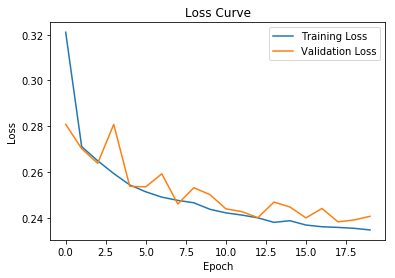

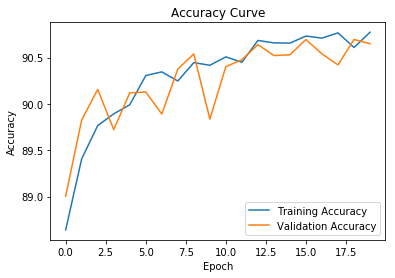

Test: [0/110]	Time 0.053 (0.053)	Loss 0.2263 (0.2263)	Accuracy 89.000 (89.000)
Test: [10/110]	Time 0.005 (0.011)	Loss 0.1562 (0.2309)	Accuracy 93.000 (91.000)
Test: [20/110]	Time 0.008 (0.009)	Loss 0.0992 (0.2203)	Accuracy 96.000 (91.476)
Test: [30/110]	Time 0.006 (0.008)	Loss 0.4504 (0.2349)	Accuracy 81.000 (90.774)
Test: [40/110]	Time 0.006 (0.008)	Loss 0.2482 (0.2353)	Accuracy 92.000 (90.805)
Test: [50/110]	Time 0.005 (0.007)	Loss 0.1316 (0.2280)	Accuracy 95.000 (91.176)
Test: [60/110]	Time 0.007 (0.007)	Loss 0.2066 (0.2329)	Accuracy 90.000 (90.984)
Test: [70/110]	Time 0.007 (0.007)	Loss 0.2598 (0.2381)	Accuracy 90.000 (90.817)
Test: [80/110]	Time 0.005 (0.007)	Loss 0.2217 (0.2362)	Accuracy 93.000 (90.815)
Test: [90/110]	Time 0.006 (0.007)	Loss 0.3082 (0.2368)	Accuracy 92.000 (90.791)
Test: [100/110]	Time 0.007 (0.007)	Loss 0.2214 (0.2373)	Accuracy 93.000 (90.792)


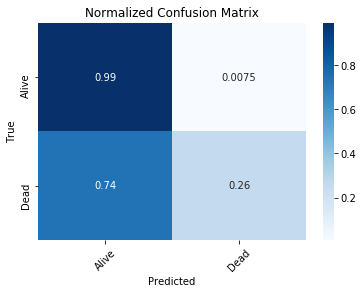

In [88]:
# train model

model = MyVariableRNN(num_features)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

best_val_acc = 0.0
train_losses, train_accuracies = [], []
valid_losses, valid_accuracies = [], []
for epoch in range(NUM_EPOCHS):
	train_loss, train_accuracy = train(model, device, train_loader, criterion, optimizer, epoch)
	valid_loss, valid_accuracy, valid_results = evaluate(model, device, valid_loader, criterion)

	train_losses.append(train_loss)
	valid_losses.append(valid_loss)

	train_accuracies.append(train_accuracy)
	valid_accuracies.append(valid_accuracy)

	is_best = valid_accuracy > best_val_acc  # let's keep the model that has the best accuracy, but you can also use another metric.
	if is_best:
		best_val_acc = valid_accuracy
		torch.save(model, os.path.join(PATH_OUTPUT, "MyVariableRNN.pth"))

best_model = torch.load(os.path.join(PATH_OUTPUT, "MyVariableRNN.pth"))
# TODO: For your report, try to make plots similar to those in the previous task.
# TODO: You may use the validation set in case you cannot use the test set.

plot_learning_curves(train_losses, valid_losses, train_accuracies, valid_accuracies)
valid_loss, valid_accuracy, valid_results = evaluate(best_model, device, valid_loader, criterion)
class_names = ['Alive', 'Dead']
plot_confusion_matrix(valid_results, class_names)

In [89]:
# prediction on test dataset
def predict_mortality(model, device, data_loader):
	model.eval()
	# TODO: Evaluate the data (from data_loader) using model,
	# TODO: return a List of probabilities
	# probas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
	probas = []
	    
	for i, (inputs, targets) in enumerate(data_loader):
		outputs = model(inputs)
		probas.extend(torch.sigmoid(outputs)[:, 1])
  
	return probas

test_prob = predict_mortality(best_model, device, test_loader)

In [90]:
preds = [i.item() for i in test_prob]

In [91]:
import numpy as np
from sklearn import metrics
y = test_label
fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=1)
metrics.auc(fpr, tpr)

0.8558393210455065

In [92]:
metrics.roc_auc_score(y, preds)

0.8558393210455065